## **AML ASSIGNMENT4 - TEXT & SEQUENCE DATA**

In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

**The sentiment labels in the IMDB dataset classify movie reviews as either positive or negative.**

**Each review is converted into a set of word embeddings during preprocessing, with a fixed-length vector representing each word.**

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
emb_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

**A 100-sample training dataset for a specially trained embedding layer**

In [3]:
# The number of words that should be considered as features
features = 10000

length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_tr = x_train[:100]
y_tr = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

hist1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.5764 - loss: 0.6716 - val_acc: 0.8144 - val_loss: 0.4464
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8490 - loss: 0.3778 - val_acc: 0.8590 - val_loss: 0.3340
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8895 - loss: 0.2726 - val_acc: 0.8558 - val_loss: 0.3267
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9061 - loss: 0.2356 - val_acc: 0.8734 - val_loss: 0.2995
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9271 - loss: 0.2017 - val_acc: 0.8694 - val_loss: 0.3075
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9369 - loss: 0.1682 - val_acc: 0.8710 - val_loss: 0.3096
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9439 - loss: 0.1528 - val_acc: 0.8686 - val_loss: 0.3180
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9551 - loss: 0.1317 - val_acc: 0.8640 - val_loss: 0.3347
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

**Plotting accuracy/loss for training and validation across**

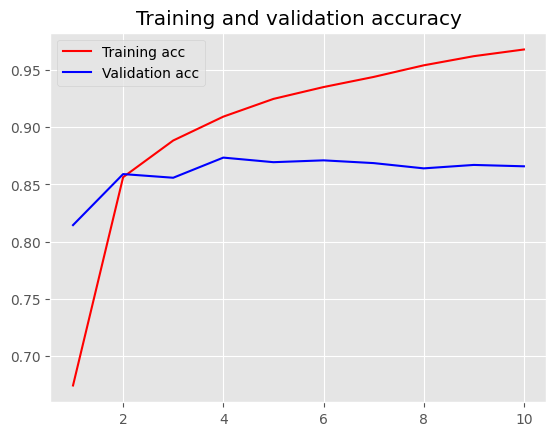

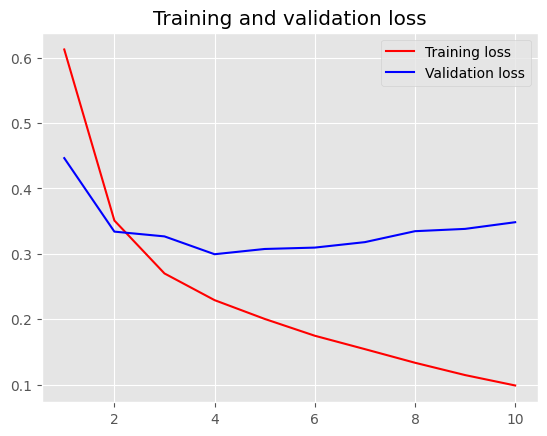

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = hist1.history["acc"]
# Validation accuracy
val_accuracy = hist1.history["val_acc"]
# Train loss
Train_loss = hist1.history["loss"]
# Validation loss
val_loss = hist1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, val_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Assessing the model using the test dataset and displaying the accuracy and loss results.**

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8609 - loss: 0.3550
Test loss: 0.35563215613365173
Test accuracy: 0.8628799915313721


**An embedding layer that has been specially trained using a training dataset of 5,000 examples.**

In [6]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_tr = x_train[:5000]
y_tr = y_train[:5000]

**A neural network model's definition, compilation, and training consist of an embedding layer and a dense output layer.**

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
hist2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5728 - loss: 0.6720 - val_acc: 0.8158 - val_loss: 0.4473
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8441 - loss: 0.3836 - val_acc: 0.8630 - val_loss: 0.3294
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8889 - loss: 0.2734 - val_acc: 0.8638 - val_loss: 0.3157
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9087 - loss: 0.2344 - val_acc: 0.8656 - val_loss: 0.3069
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9257 - loss: 0.1990 - val_acc: 0.8656 - val_loss: 0.3136
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9393 - loss: 0.1720 - val_acc: 0.8634 - val_loss: 0.3255
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9475 - loss: 0.1494 - val_acc: 0.8612 - val_loss: 0.3365
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9531 - loss: 0.1337 - val_acc: 0.8572 - val_loss: 0.3548
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

**Plotting training and validation accuracy/loss over epochs for the second model's training history.**

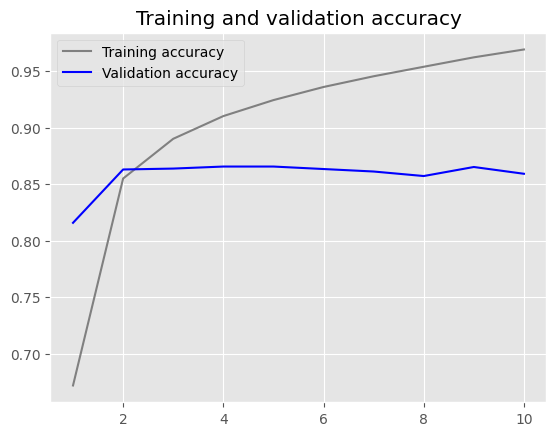

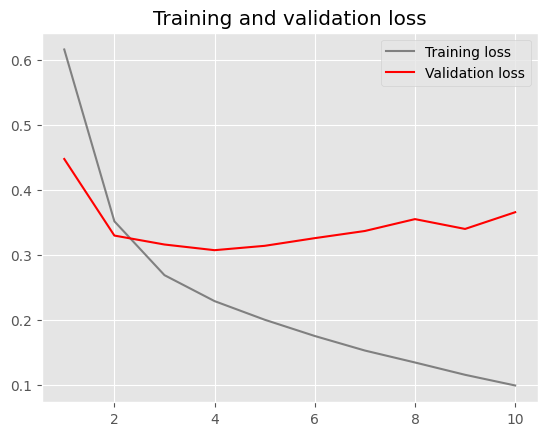

In [8]:
accuracy2 = hist2.history['acc']
val_accuracy2 = hist2.history['val_acc']
Train_loss2 = hist2.history['loss']
val_loss2 = hist2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, val_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Testing the second model on the test dataset and displaying the accuracy and loss results**

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8591 - loss: 0.3622
Test loss: 0.3622620403766632
Test accuracy: 0.858519971370697


**An embedding layer that was specially trained using a 1,000-sample training dataset**

In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_tr = x_train[:1000]
y_tr = y_train[:1000]

**An embedding layer and a dense output layer are used in the definition, construction, and training of a neural network model for binary classification.**

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
hist3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5727 - loss: 0.6701 - val_acc: 0.8102 - val_loss: 0.4398
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8459 - loss: 0.3708 - val_acc: 0.8602 - val_loss: 0.3370
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8892 - loss: 0.2743 - val_acc: 0.8570 - val_loss: 0.3295
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9091 - loss: 0.2292 - val_acc: 0.8694 - val_loss: 0.3065
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9224 - loss: 0.2023 - val_acc: 0.8554 - val_loss: 0.3465
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9299 - loss: 0.1842 - val_acc: 0.8720 - val_loss: 0.3063
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9418 - loss: 0.1615 - val_acc: 0.8660 - val_loss: 0.3303
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9499 - loss: 0.1448 - val_acc: 0.8686 - val_loss: 0.3271
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - ac

**Charting the training history of the third model's accuracy/loss during training and validation across epochs**

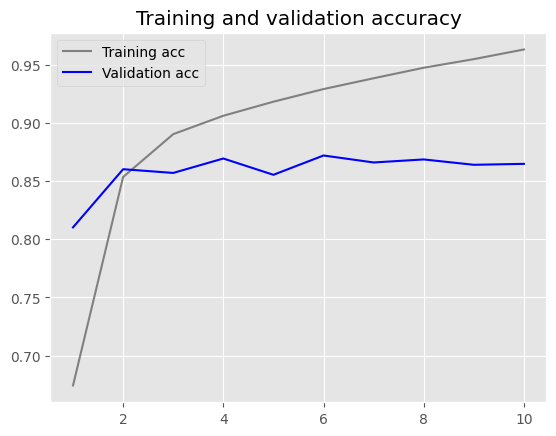

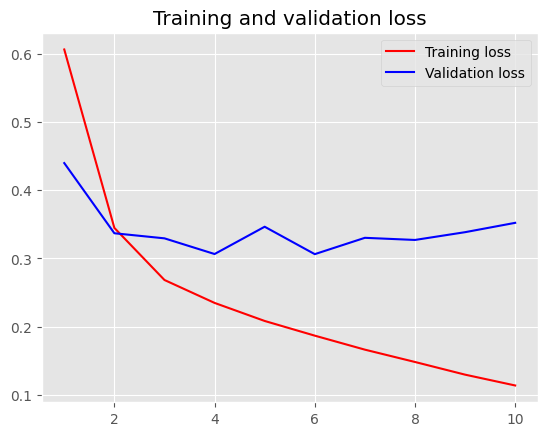

In [12]:
accuracy3 = hist3.history["acc"]
val_accuracy3 = hist3.history["val_acc"]
Train_loss3 = hist3.history["loss"]
val_loss3 = hist3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, val_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, val_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Using the test dataset to evaluate the second model and printing the accuracy and loss results**

In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8612 - loss: 0.3550
Test loss: 0.35315316915512085
Test accuracy: 0.8613600134849548


**A specially trained embedding layer with a 10,000 training sample**

In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_tr = x_train[:10000]
y_tr = y_train[:10000]

**For binary classification, defining, assembling, and training a neural network model with an embedding layer and a dense output layer**

In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
hist4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.6112 - loss: 0.6595 - val_acc: 0.7944 - val_loss: 0.4476
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8535 - loss: 0.3637 - val_acc: 0.8614 - val_loss: 0.3300
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8927 - loss: 0.2704 - val_acc: 0.8666 - val_loss: 0.3130
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9103 - loss: 0.2289 - val_acc: 0.8702 - val_loss: 0.3065
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9242 - loss: 0.1990 - val_acc: 0.8706 - val_loss: 0.3112
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9357 - loss: 0.1787 - val_acc: 0.8672 - val_loss: 0.3180
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9423 - loss: 0.1586 - val_acc: 0.8642 - val_loss: 0.3318
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9549 - loss: 0.1364 - val_acc: 0.8630 - val_loss: 0.3407
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

**The fourth model's training history is plotted over epochs with training and validation accuracy/loss**

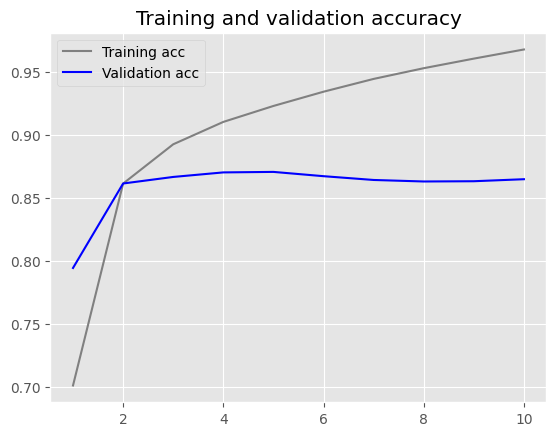

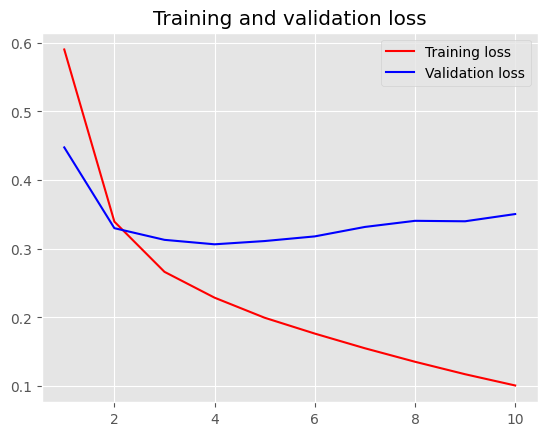

In [16]:
accuracy4 = hist4.history["acc"]
val_accuracy4 = hist4.history["val_acc"]
Train_loss4 = hist4.history["loss"]
val_loss4 = hist4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, val_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, val_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

**Using the test dataset to evaluate the second model and printing the accuracy and loss results**

In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8628 - loss: 0.3494
Test loss: 0.35057905316352844
Test accuracy: 0.8637999892234802


**The IMDB dataset is downloaded, extracted, and the unsupervised training data is eliminated.**

In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2277k      0  0:00:36  0:00:36 --:--:-- 1424k


**The training dataset is loaded, and sentiment labels are assigned (0 for negative, 1 for positive) to IMDB movie reviews.**

In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

**Employing Pretrained Word Embeddings: Pretrained embeddings are used when there is not enough training data to learn word embeddings in addition to the desired solution.**

**Data tokenization.**

In [20]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
val_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_data] # (200, 100)
y_tr = labels[:train_data] # shape (200,)
x_val = data[train_data:train_data+val_data] # shape (10000, 100)
y_val = labels[train_data:train_data+val_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Installation and setup for glove word embedding**

In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
emb_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        emb_index[word] = coefs

print("Found %s word vectors." % len(emb_index))

Found 400000 word vectors.


**With 400,000 words and 6 billion tokens, we trained the 6B version of the GloVe model using Gigaword 5 and Wikipedia data.**

**Getting the GloVe word embedding matrix ready.**


**Layer for pre-trained word embedding with a training sample size of 100**

In [22]:
emb_di = 100

emb_matrix = np.zeros((words, emb_di))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:
            # Words not found in embedding index will be all-zeros.
            emb_matrix[i] = emb_vector

**Constructing a sequential neural network with dense layers, flattening, and a trainable embedding layer for binary classification**

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, emb_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Constructing a neural network with dense layers for binary classification after a pre-trained, non-trainable embedding layer**

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Set trainable=False initially to use pre-trained embeddings
model.add(Embedding(words, emb_di, input_length=length2, trainable=False, weights=[emb_matrix]))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# You don't need this anymore since you set weights and trainable in the Embedding layer definition
# model.layers[0].set_weights([emb_matrix])
# model.layers[0].trainable = False

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

**With the Embedding layer, pre-trained word embeddings are used. These embeddings are guaranteed to stay the same throughout training if 'trainable' is set to 'False' prior to initializing the Embedding layer. The word embedding values can be updated during the optimization process if trainable is set to True. Pre-trained embeddings should not be updated while the remainder of the model is still being trained in order to save them from losing their prior knowledge.**

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include '.weights.h5'

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.5023 - loss: 0.7589 - val_acc: 0.4966 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5057 - loss: 0.6944 - val_acc: 0.5029 - val_loss: 0.6932
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4996 - loss: 0.6922 - val_acc: 0.5004 - val_loss: 0.6939
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5251 - loss: 0.6845 - val_acc: 0.5109 - val_loss: 0.7071
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5297 - loss: 0.6740 - val_acc: 0.5090 - val_loss: 0.7133
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5567 - loss: 0.6548 - val_acc: 0.5228 - val_loss: 0.7278
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6348 - loss: 0.6181 - val_acc: 0.5132 - val_loss: 0.8299
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7012 - loss: 0.5661 - val_acc: 0.5055 - val_loss: 0.8428
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

**As anticipated, the model quickly overfits given the small amount of training data. This is also the reason for the notable variations in validation accuracy.**

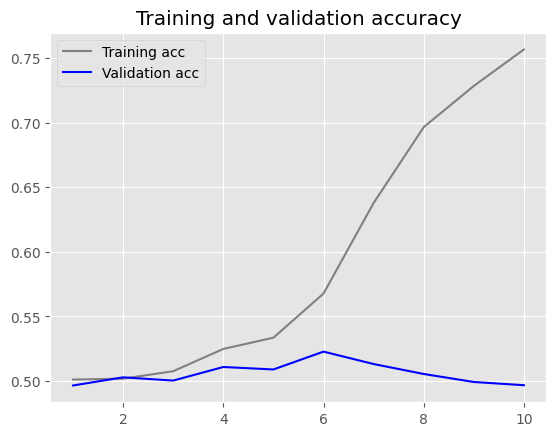

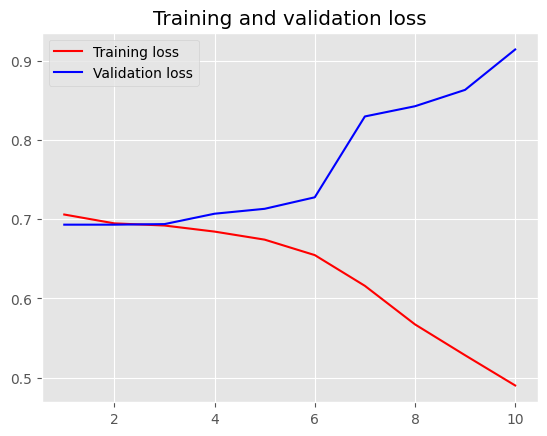

In [26]:
import matplotlib.pyplot as plt

accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Testing the second model on the test dataset and displaying the accuracy and loss results**

In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5396 - loss: 0.8822
Test loss: 0.8733486533164978
Test accuracy: 0.5423600077629089


**Training sample size for the pretrained word embedding layer is 5000.**

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000 # Training sample is 5000
val_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_data]
y_tr = labels[:train_data]
x_validation = data[train_data:train_data+val_data]
y_validation = labels[train_data:train_data+val_data]
emb_di = 100

emb_matrix = np.zeros((words, emb_di))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:

            emb_matrix[i] = emb_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Define, train, and assess a neural network using GloVe with a pre-trained embedding layer, and plot the accuracy and loss of training and validation**

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4969 - loss: 0.7479 - val_acc: 0.4954 - val_loss: 0.6932
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5107 - loss: 0.6935 - val_acc: 0.4996 - val_loss: 0.6955
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5840 - loss: 0.6747 - val_acc: 0.5052 - val_loss: 0.7850
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6585 - loss: 0.6242 - val_acc: 0.5005 - val_loss: 0.7939
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7067 - loss: 0.5649 - val_acc: 0.5076 - val_loss: 0.8513
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7392 - loss: 0.5282 - val_acc: 0.5110 - val_loss: 0.9706
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7661 - loss: 0.4834 - val_acc: 0.5016 - val_loss: 0.9951
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7972 - loss: 0.4330 - val_acc: 0.5055 - val_loss: 1.1598
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

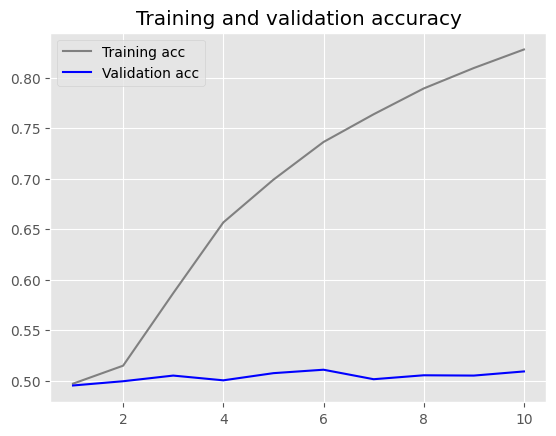

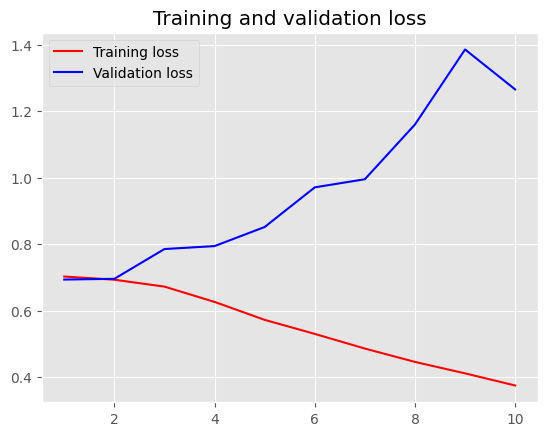

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

model11 = Sequential()
model11.add(Embedding(words, emb_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

# Build the Embedding layer before setting weights
model11.layers[0].build((None,))  # (None,) represents the input shape

# Now you can set the weights
model11.layers[0].set_weights([emb_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

accuracy11 = hist11.history['acc']
val_acc11 = hist11.history['val_acc']
train_loss11 = hist11.history['loss']
val_loss11 = hist11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Printing the test accuracy and loss after evaluating the second model on the test dataset**

In [30]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5720 - loss: 1.0228
Test loss: 1.0267517566680908
Test accuracy: 0.5690000057220459


**Layer for pre-trained word embedding with a training sample size of 1000**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.5080 - loss: 0.7396 - val_acc: 0.4959 - val_loss: 0.6976
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5282 - loss: 0.6898 - val_acc: 0.4949 - val_loss: 0.6961
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5974 - loss: 0.6707 - val_acc: 0.4963 - val_loss: 0.7629
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6438 - loss: 0.6266 - val_acc: 0.4976 - val_loss: 0.7433
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6860 - loss: 0.5812 - val_acc: 0.4962 - val_loss: 0.7641
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7258 - loss: 0.5320 - val_acc: 0.5008 - val_loss: 0.8325
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7501 - loss: 0.4882 - val_acc: 0.4974 - val_loss: 1.2725
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7699 - loss: 0.4451 - val_acc: 0.4988 - val_loss: 0.9703
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

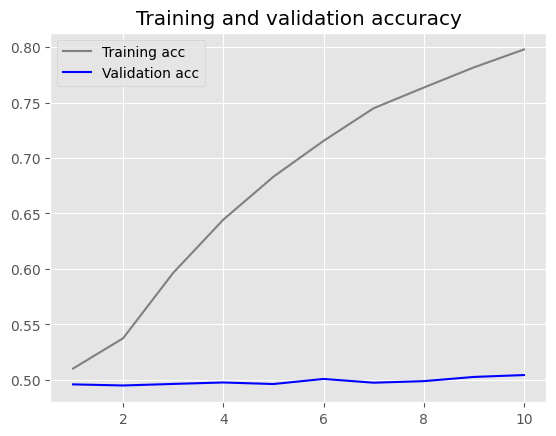

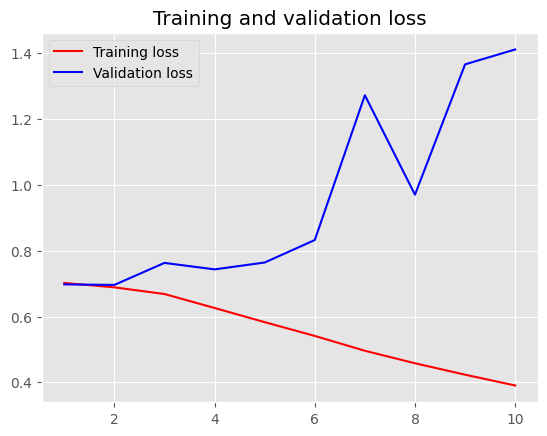

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras instead of keras
from tensorflow.keras.utils import pad_sequences # Use tensorflow.keras instead of keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


length = 150
train_data = 1000 #Trains on 1000 samples
val_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_data]
y_tr = labels[:train_data]
x_val = data[train_data:train_data+val_data]
y_val = labels[train_data:train_data+val_data]
emb_dim = 100

emb_matrix = np.zeros((words, emb_dim))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:

            emb_matrix[i] = emb_vector


model12 = Sequential()
# Pass the pre-trained weights directly to the Embedding layer during initialization
model12.add(Embedding(words, emb_dim, input_length=length, weights=[emb_matrix], trainable=False))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

# Removed the line: model12.layers[0].set_weights([emb_matrix])
# Removed the line: model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = hist12.history['acc']
val_acc12 = hist12.history['val_acc']
loss12 = hist12.history['loss']
val_loss12 = hist12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Using the test dataset to evaluate the second model and printing the accuracy and loss results**

In [32]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5769 - loss: 1.1607
Test loss: 1.150647521018982
Test accuracy: 0.5773599743843079


**Word embedding layer that has been pretrained with a 10,000 training sample**

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.6936 - loss: 0.5359 - val_acc: 0.4856 - val_loss: 1.0678
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.9430 - loss: 0.1570 - val_acc: 0.4908 - val_loss: 1.5284
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9945 - loss: 0.0226 - val_acc: 0.4891 - val_loss: 2.1623
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9990 - loss: 0.0036 - val_acc: 0.4907 - val_loss: 2.7612
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9998 - loss: 7.6430e-04 - val_acc: 0.4886 - val_loss: 3.1356
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 1.3444e-04 - val_acc: 0.4959 - val_loss: 3.2271
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 3.4712e-05 - val_acc: 0.4927 - val_loss: 3.3500
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 1.0000 - loss: 1.6518e-05 - val_acc: 0.4928 - val_loss: 3.4283
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 

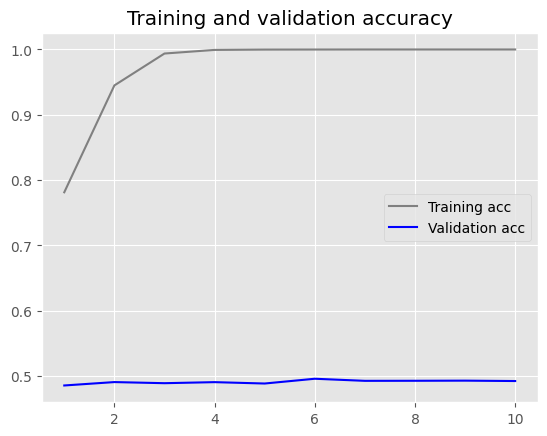

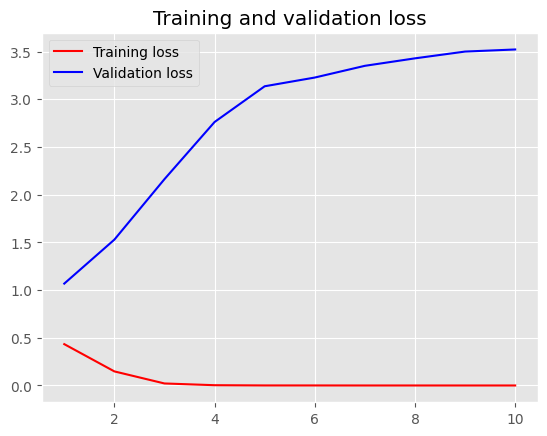

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_tr = data[:train_ds]
y_tr = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
emb_dim = 100

emb_matrix = np.zeros((words, emb_dim))
for word, i in word_index.items():
    emb_vector = emb_index.get(word)
    if i < words:
        if emb_vector is not None:

            emb_matrix[i] = emb_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model13 = Sequential()
model13.add(Embedding(words, emb_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
hist13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

accuracy13 = hist13.history['acc']
val_acc13 = hist13.history['val_acc']
loss13 = hist13.history['loss']
val_loss13 = hist13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, val_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, val_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Using the test dataset to evaluate the second model and printing the accuracy and loss results**

In [34]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8320 - loss: 0.9332
Test loss: 0.9247171878814697
Test accuracy: 0.8329200148582458
